Extracting EDF parameters from /Users/md.tajim/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


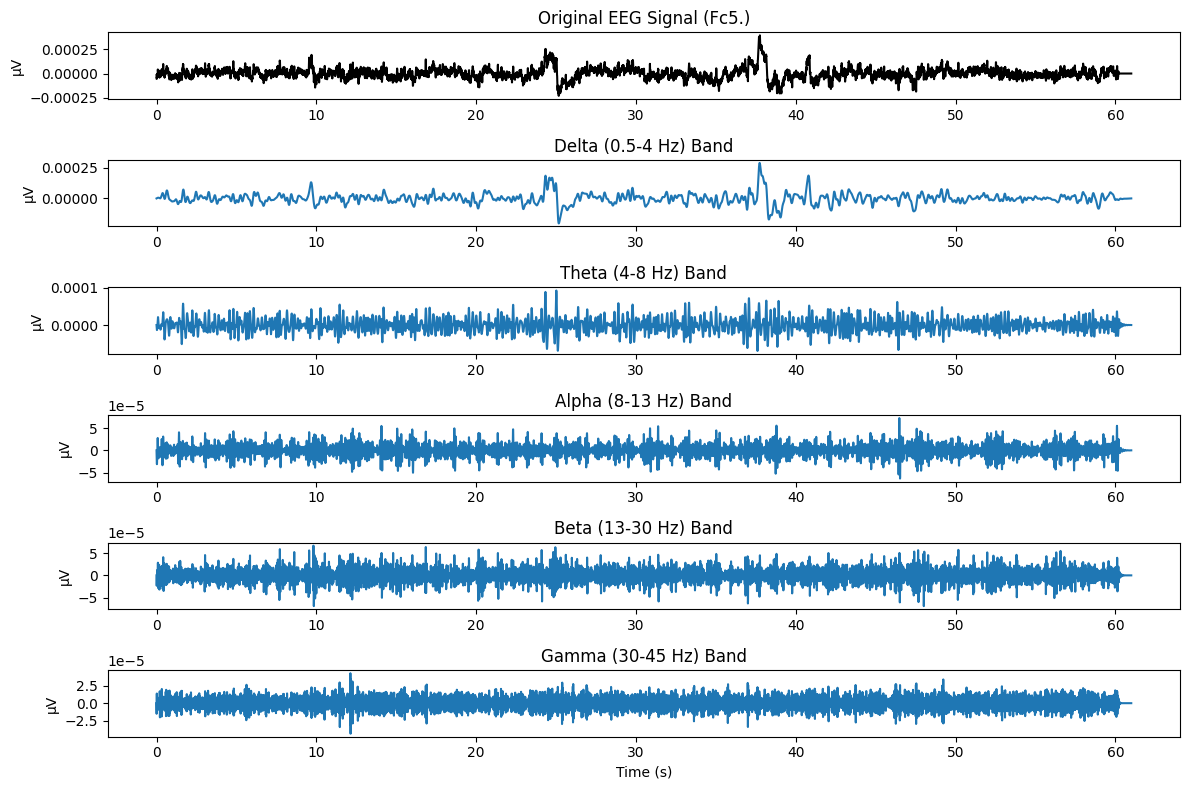


EEG Band Statistical Features:
                  Mean  Std Dev  Variance  Skewness  Kurtosis  RMS  Band Power
Delta (0.5-4 Hz)   0.0      0.0       0.0    0.6923    6.4781  0.0         0.0
Theta (4-8 Hz)    -0.0      0.0       0.0    0.2412    0.8139  0.0         0.0
Alpha (8-13 Hz)   -0.0      0.0       0.0    0.0061    0.7088  0.0         0.0
Beta (13-30 Hz)   -0.0      0.0       0.0    0.0018    0.9454  0.0         0.0
Gamma (30-45 Hz)  -0.0      0.0       0.0   -0.0029    0.3404  0.0         0.0


<Figure size 640x480 with 0 Axes>

In [ ]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# -------------------------
# 1️⃣ Load EEG data
# -------------------------
# You can replace this path with your EEG file (.edf, .fif, etc.)
# For demo, we'll use MNE's sample EEG data (Subject 1, run 1)
sample_file = mne.datasets.eegbci.load_data(1, runs=[1])[0]
raw = mne.io.read_raw_edf(sample_file, preload=True)

# Pick only EEG channels (ignore EOG, EMG, etc.)
raw.pick_types(eeg=True)

# Get basic info
sfreq = raw.info["sfreq"]  # sampling frequency
channel = raw.ch_names[0]  # just use first EEG channel for demo
signal = raw.get_data(picks=channel)[0]
time = np.arange(len(signal)) / sfreq

# -------------------------
# 2️⃣ Define EEG bands
# -------------------------
bands = {
    "Delta (0.5-4 Hz)": (0.5, 4),
    "Theta (4-8 Hz)": (4, 8),
    "Alpha (8-13 Hz)": (8, 13),
    "Beta (13-30 Hz)": (13, 30),
    "Gamma (30-45 Hz)": (30, 45),
}

# -------------------------
# 3️⃣ Filter and plot each band
# -------------------------
plt.figure(figsize=(12, 8))
plt.subplot(len(bands) + 1, 1, 1)
plt.plot(time, signal, color="black")
plt.title(f"Original EEG Signal ({channel})")
plt.ylabel("µV")

features = {}

for i, (band, (low, high)) in enumerate(bands.items(), start=2):
    filtered = raw.copy().filter(l_freq=low, h_freq=high, verbose=False)
    band_signal = filtered.get_data(picks=channel)[0]

    plt.subplot(len(bands) + 1, 1, i)
    plt.plot(time, band_signal)
    plt.title(f"{band} Band")
    plt.ylabel("µV")

    # Extract statistical features
    features[band] = {
        "Mean": np.mean(band_signal),
        "Std Dev": np.std(band_signal),
        "Variance": np.var(band_signal),
        "Skewness": skew(band_signal),
        "Kurtosis": kurtosis(band_signal),
        "RMS": np.sqrt(np.mean(band_signal**2)),
        "Band Power": np.mean(band_signal**2),
    }

plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()

plt.savefig("eeg_bands_plot.png", dpi=300, bbox_inches="tight")

# Convert features dict to DataFrame for tabular display
features_df = pd.DataFrame(features).T  # Transpose for bands as rows

print("\nEEG Band Statistical Features:")
print(features_df.round(4).to_string())